# Splines

In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la

la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name="cell").astype(str))
genes = la.Dim(pd.Series(range(4), name="gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000,  0.8106,  0.2516,  0.1249,  0.8798, -0.2506, -1.7392, -2.1169,
        -2.5869, -2.7337])
tensor([-10.9875])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([genes, knots])
)

In [7]:
dist.run()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000, -0.6114,  1.2260,  2.6856,  1.7717,  1.1136,  0.3371,  0.5948,
          0.2358, -1.3063],
        [ 0.0000, -1.6298, -0.0476, -0.6406, -0.1039,  0.7817,  1.3718,  1.5732,
         -0.9094, -1.9579],
        [ 0.0000, -0.0588, -0.1464, -0.2369,  0.7248,  2.3217,  2.8231,  0.8043,
          2.6182,  2.8469],
        [ 0.0000, -1.0593,  0.7722,  0.5852,  0.6855,  3.1105,  3.5202,  5.3650,
          4.6226,  5.7657]])
tensor([[-13.4328],
        [-15.3881],
        [-13.8524],
        [-16.1857]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(), definition=la.Definition([knots, genes])
)

In [10]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.9533, -0.3230,  1.0460, -0.4353],
        [ 2.3816, -1.3622,  1.9454, -0.2998],
        [ 3.5441, -3.0364,  0.5594, -0.0675],
        [ 2.1936, -2.2139,  1.1350, -1.1295],
        [ 3.7528, -2.3218,  1.1555, -2.1957],
        [ 2.2729, -2.6095,  2.1387, -2.6389],
        [ 2.1748, -2.6264,  4.5571, -4.0556],
        [ 2.6112, -1.8280,  4.9621, -3.1410],
        [ 2.0811, -2.3457,  5.7232, -4.1445]])
tensor([[-2.8267, -0.9711, -1.4660, -1.0137],
        [-1.0107, -1.4589, -1.3234, -0.9281],
        [-1.5946, -2.3203, -1.8794, -0.9459],
        [-1.8309, -1.2572, -1.0846, -1.4828],
        [-2.1345, -0.9248, -0.9191, -1.4874],
        [-2.0140, -0.9603, -1.4023, -1.0171],
        [-0.9238, -0.9191, -3.8433, -1.9226],
        [-1.0142, -1.2377, -1.0010, -1.3372],
        [-1.0594, -1.0529, -1.2085, -1.4224]])
tensor([[-14.4087, -11.1023, -14.1276, -11.5572]])
tensor([[-14.4087, -11.1023, -14.1276, -11.5572]])
tensor([[-8.2704, -8.2


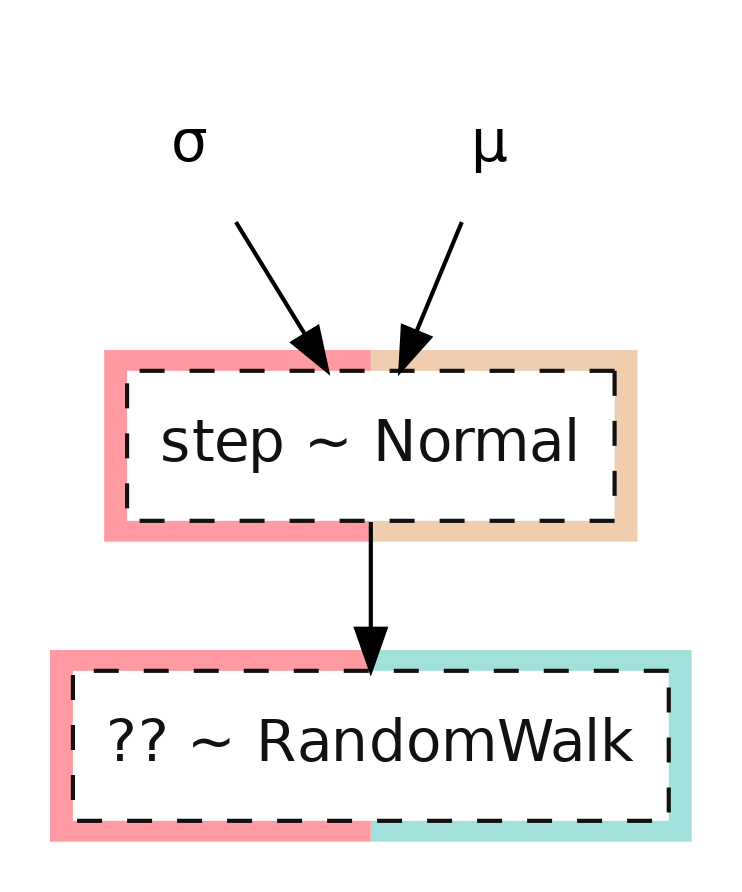

In [11]:
dist = la.distributions.RandomWalk(
    10, la.distributions.Normal(definition=la.Definition([genes]))
)
dist.plot()

In [12]:
dist.reset()
dist.run()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  2.8183,  2.9934,  2.7147,  4.0682,  3.9631,  1.9705,  2.3076,
          3.6239,  4.7498],
        [ 0.0000,  0.5188,  0.9522,  0.8857,  0.6895,  2.0304,  2.5426,  3.5334,
          2.4664,  1.4461],
        [ 0.0000, -2.2206, -3.7710, -4.1163, -3.2475, -4.1952, -3.8968, -3.9247,
         -3.4663, -5.2573],
        [ 0.0000, -0.8121, -0.1800, -0.1505, -0.6901, -1.1033, -1.6108, -0.1413,
          1.0084,  1.0190]])
tensor([[-4.8903, -0.9343, -0.9578, -1.8350, -0.9245, -2.9041, -0.9757, -1.7853,
         -1.5527],
        [-1.0535, -1.0129, -0.9211, -0.9382, -1.8180, -1.0501, -1.4098, -1.4882,
         -1.4394],
        [-3.3846, -2.1207, -0.9786, -1.2964, -1.3680, -0.9635, -0.9193, -1.0240,
         -2.5228],
        [-1.2487, -1.1187, -0.9194, -1.0645, -1.0043, -1.0477, -1.9986, -1.5798,
         -0.9190]])
tensor([[-16.7596],
        [-11.1311],
        [-14.5778],
        [-10.9006]])
tensor([[-16.7596],
        [-11.1311],
        [-14.5778],
        [-10.9006]])


In [13]:
genes = la.Dim(pd.Series(range(100), name="gene").astype(str))

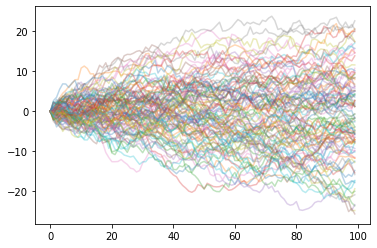

In [14]:
dist = la.distributions.RandomWalk(
    100, la.distributions.Normal(definition=la.Definition([genes]))
)
dist.run()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x=np.arange(value.shape[1]), y=value[i], alpha=0.3)

## Generative model

In [15]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name="cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 20, n_cells), index=cells.index), label="x")

In [16]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], id="gene")
knots = la.Dim(range(n_knots), id="knot")

steps = (
    np.random.choice([-1, 1], (n_genes, n_knots))
    * np.random.normal(3.0, 1.0, (n_genes, n_knots))
    * (np.random.random((n_genes, n_knots)) > 0.5)
)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims=True)
a = la.Fixed(pd.DataFrame(a_value, columns=knots.index, index=genes.index), label="a")
intercept = la.Fixed(
    pd.Series(
        np.random.choice([-1, 1], n_genes)
        * np.random.normal(3.0, 1.0, n_genes)
        * (np.random.random(n_genes) > 0.5),
        index=genes.index,
    ),
    label="intercept",
)
scale = la.Fixed(
    pd.Series(np.random.uniform(1.0, 1.2, n_genes), index=genes.index), label="scale"
)

In [22]:
y = la.links.scalar.Spline(x=x, a=a, b=intercept)
dist = la.distributions.Normal(loc=y, scale=scale, label="distribution")


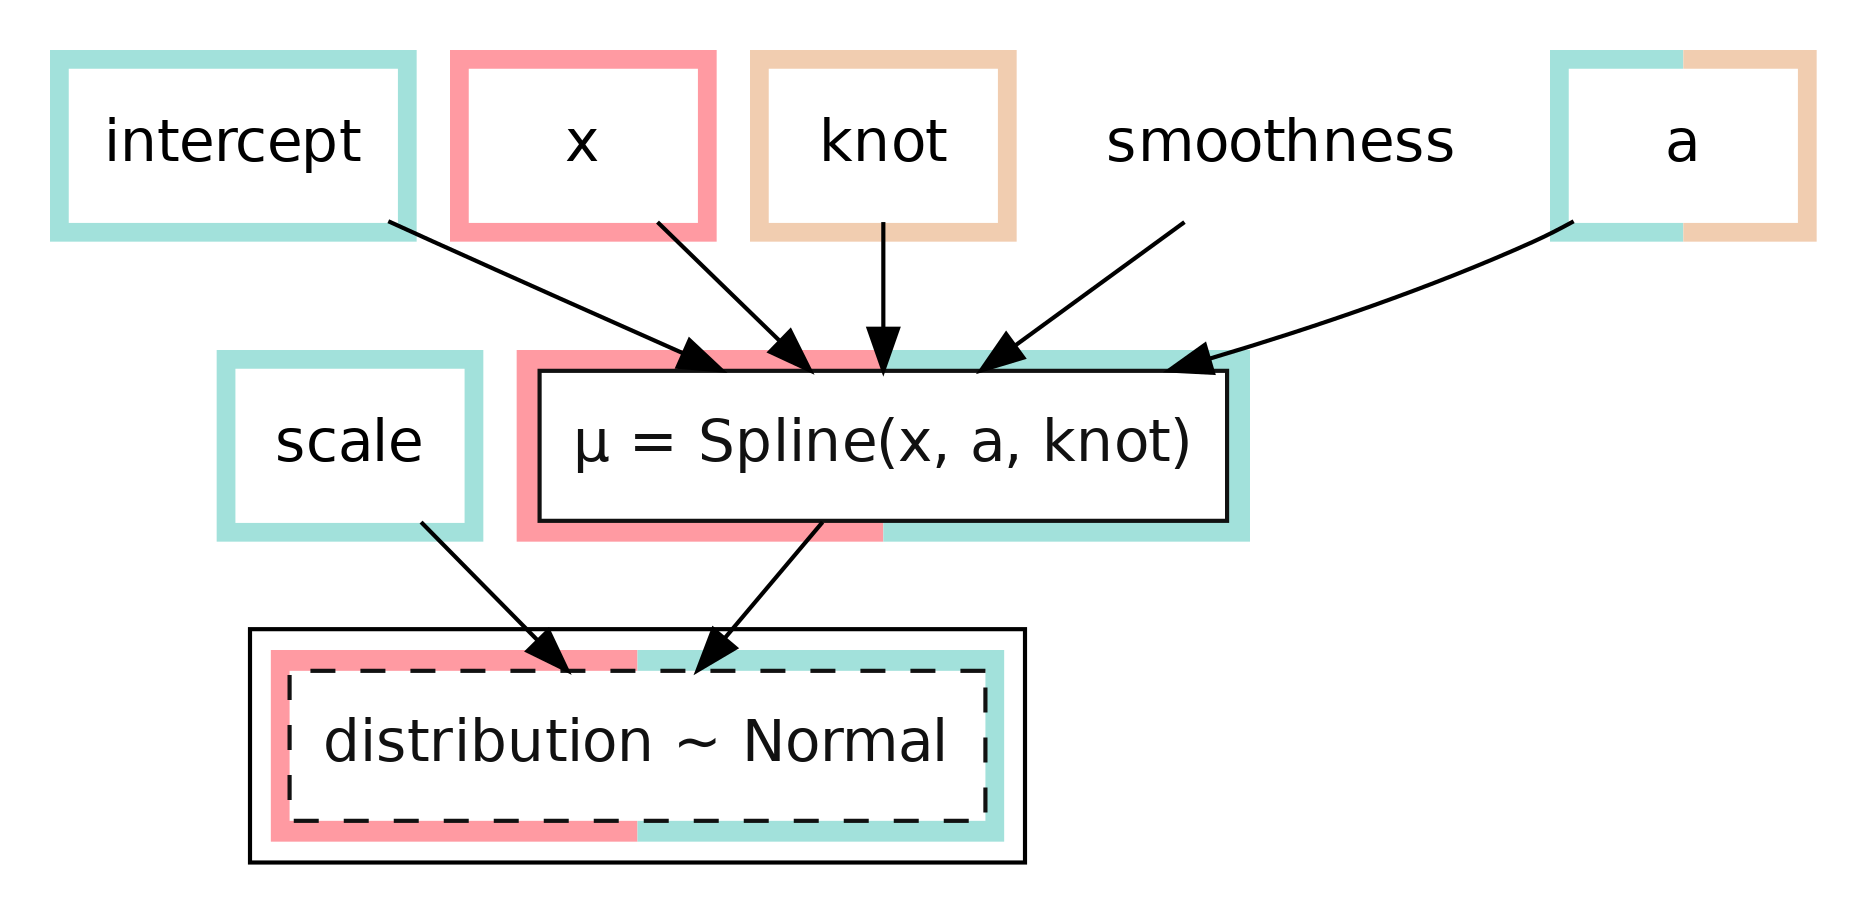

In [23]:
model_gs = la.Root(dist, label="ground truth", symbol="gs")
model_gs.plot()

In [31]:
posterior = la.posterior.Posterior(dist, retain_samples={dist.loc, dist})
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

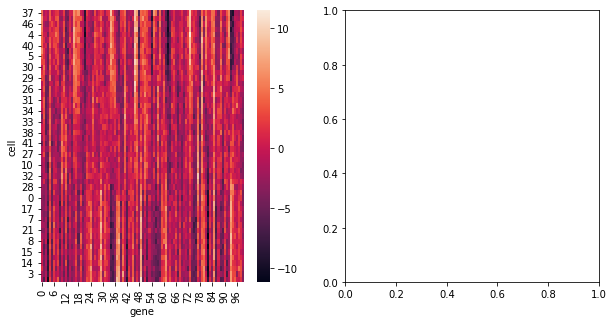

In [32]:
loc_value = posterior.samples[dist.loc].sel(sample=0).to_pandas()
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)

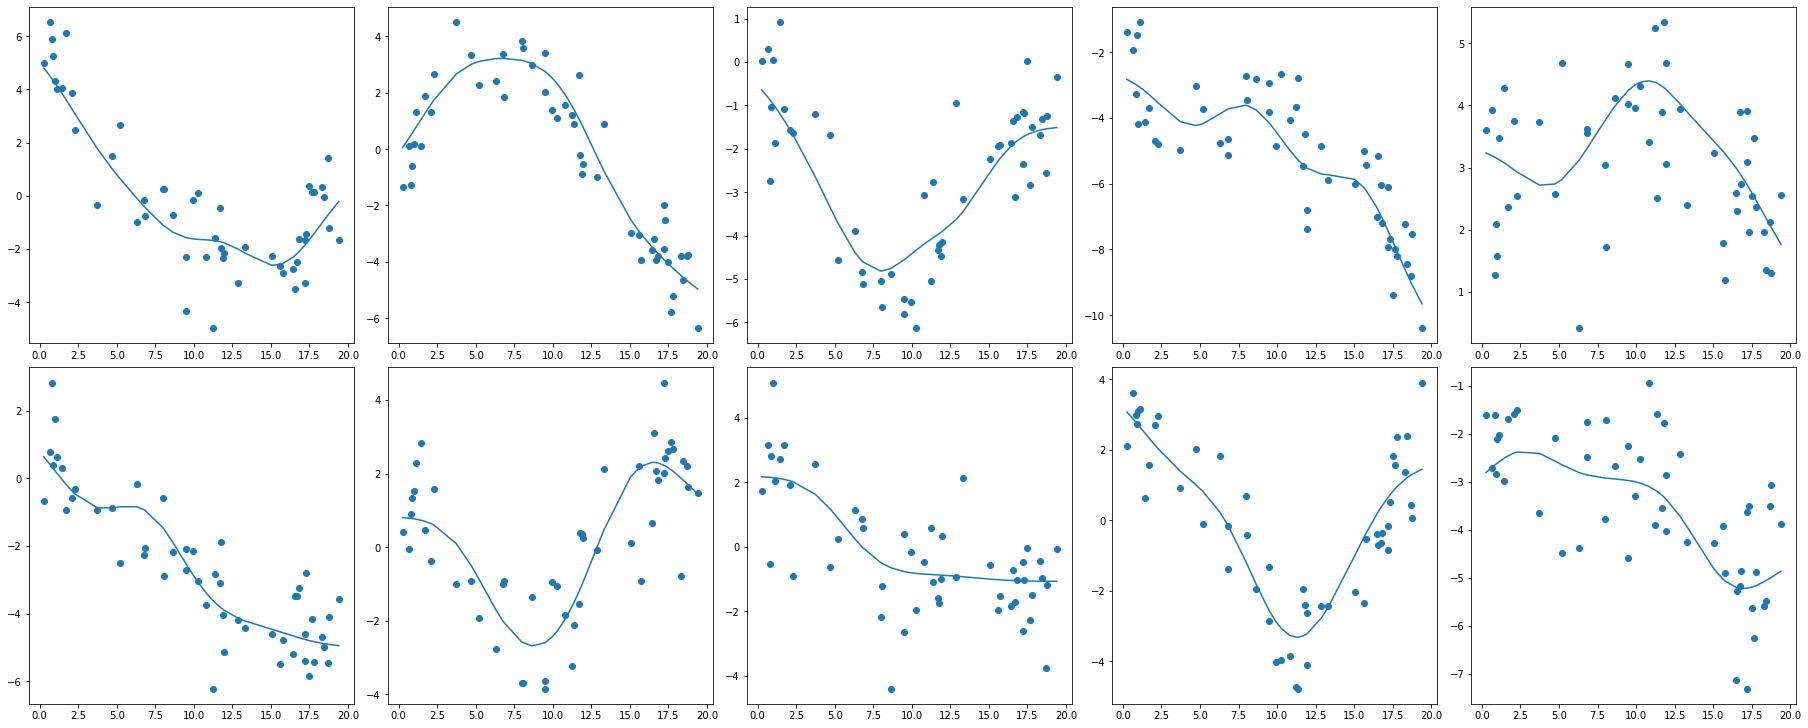

In [33]:
observation_value = posterior.samples[dist].sel(sample=0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find("x").prior_pd().sort_values().index
x_value = model_gs.find("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(x_value.loc[cell_order], observation_value.loc[cell_order, gene_id])
    ax.plot(x_value.loc[cell_order], loc_value.loc[cell_order, gene_id])
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [34]:
s = la.Parameter(
    1.0, definition=scale, transforms=la.distributions.Exponential().biject_to()
)

z = la.links.scalar.Spline(
    x, b=intercept, knot=model_gs.find("knot"), output=y.value_definition
)

dist = la.distributions.Normal(loc=z, scale=s)

observation = la.Observation(observation_value, dist, label="observation")


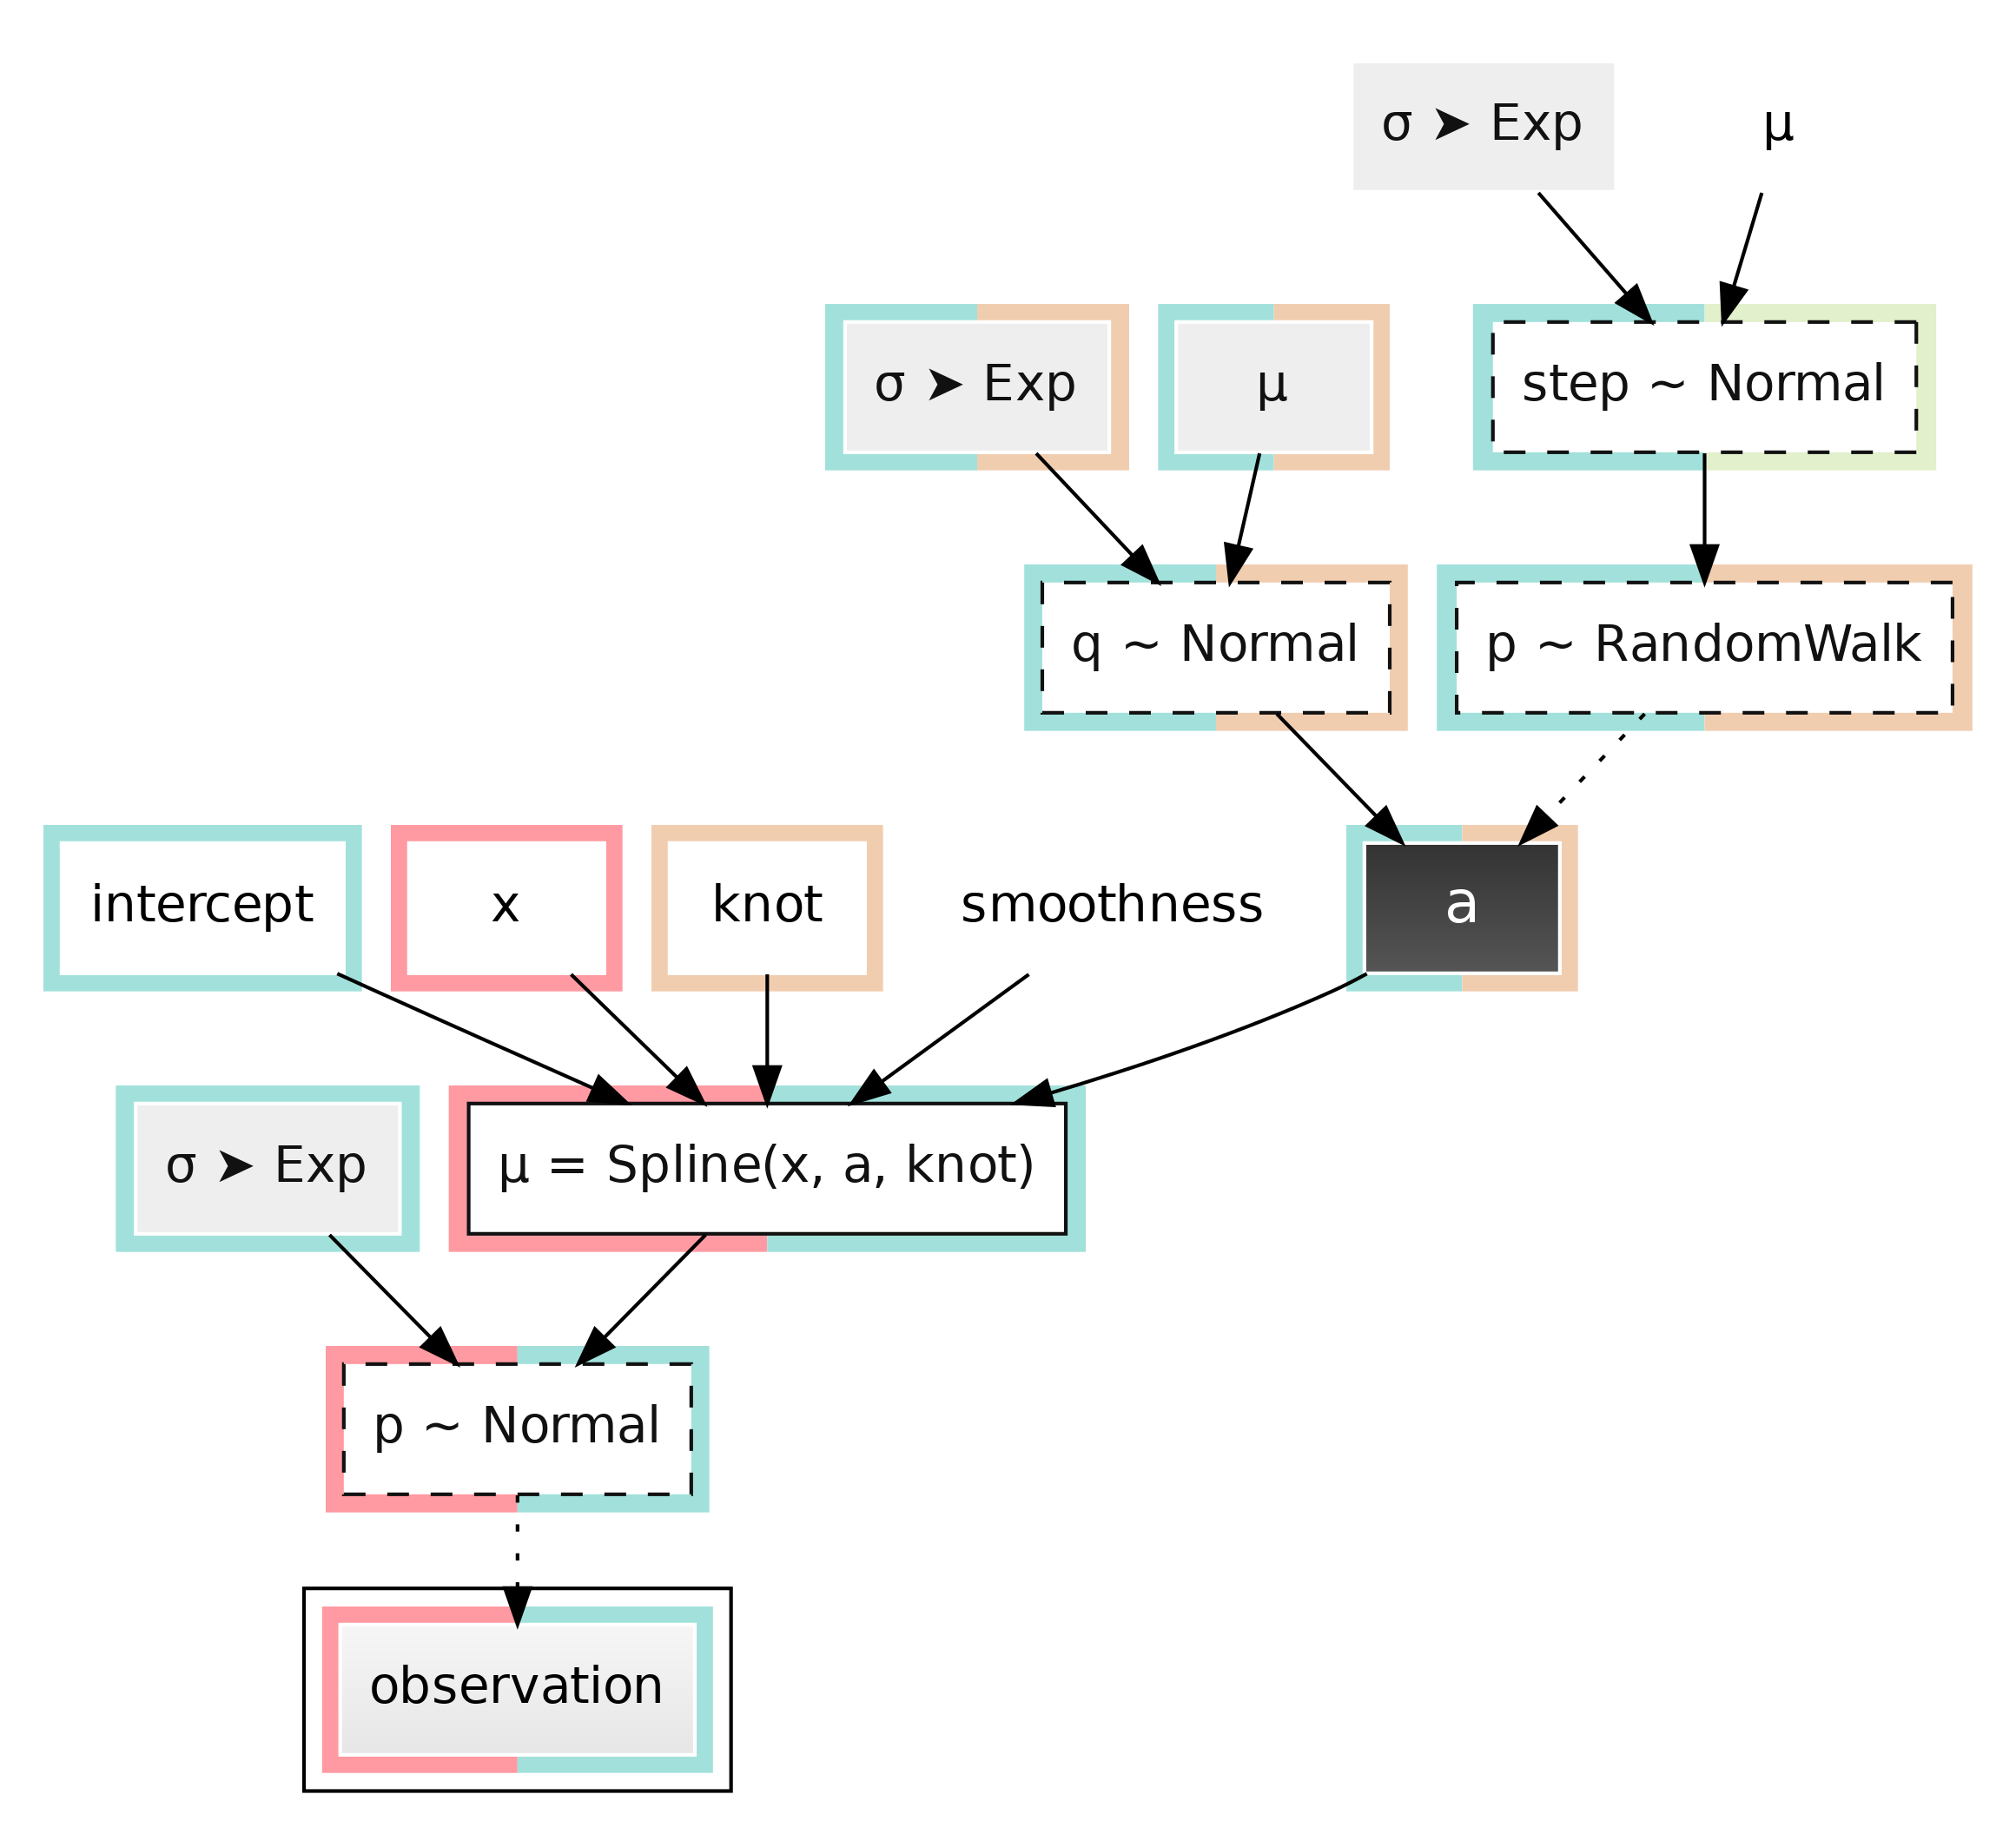

In [35]:
model = la.Root(observation)
model.plot()

  0%|                                                                                                         …

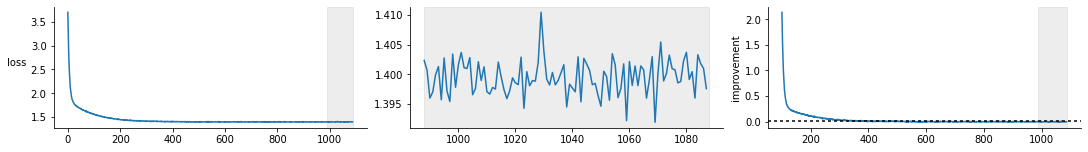

In [36]:
inference = la.infer.svi.SVI(
    model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr=0.05)
)
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot()
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [44]:
observed = la.posterior.Posterior(
    observation, retain_samples=model.components_upstream().values()
)
observed.sample(10, subsample_n=1)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

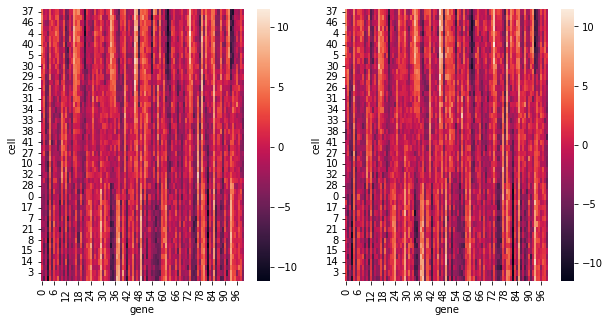

In [45]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
cell_order = model_gs.find("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax=ax0)
modelled_value = observed.samples[observation.p].sel(sample=0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax=ax1)

In [46]:
x_causal = la.posterior.scalar.ScalarVectorCausal(x, observation)
x_causal.sample(10)

  0%|          | 0/10 [00:00<?, ?it/s]

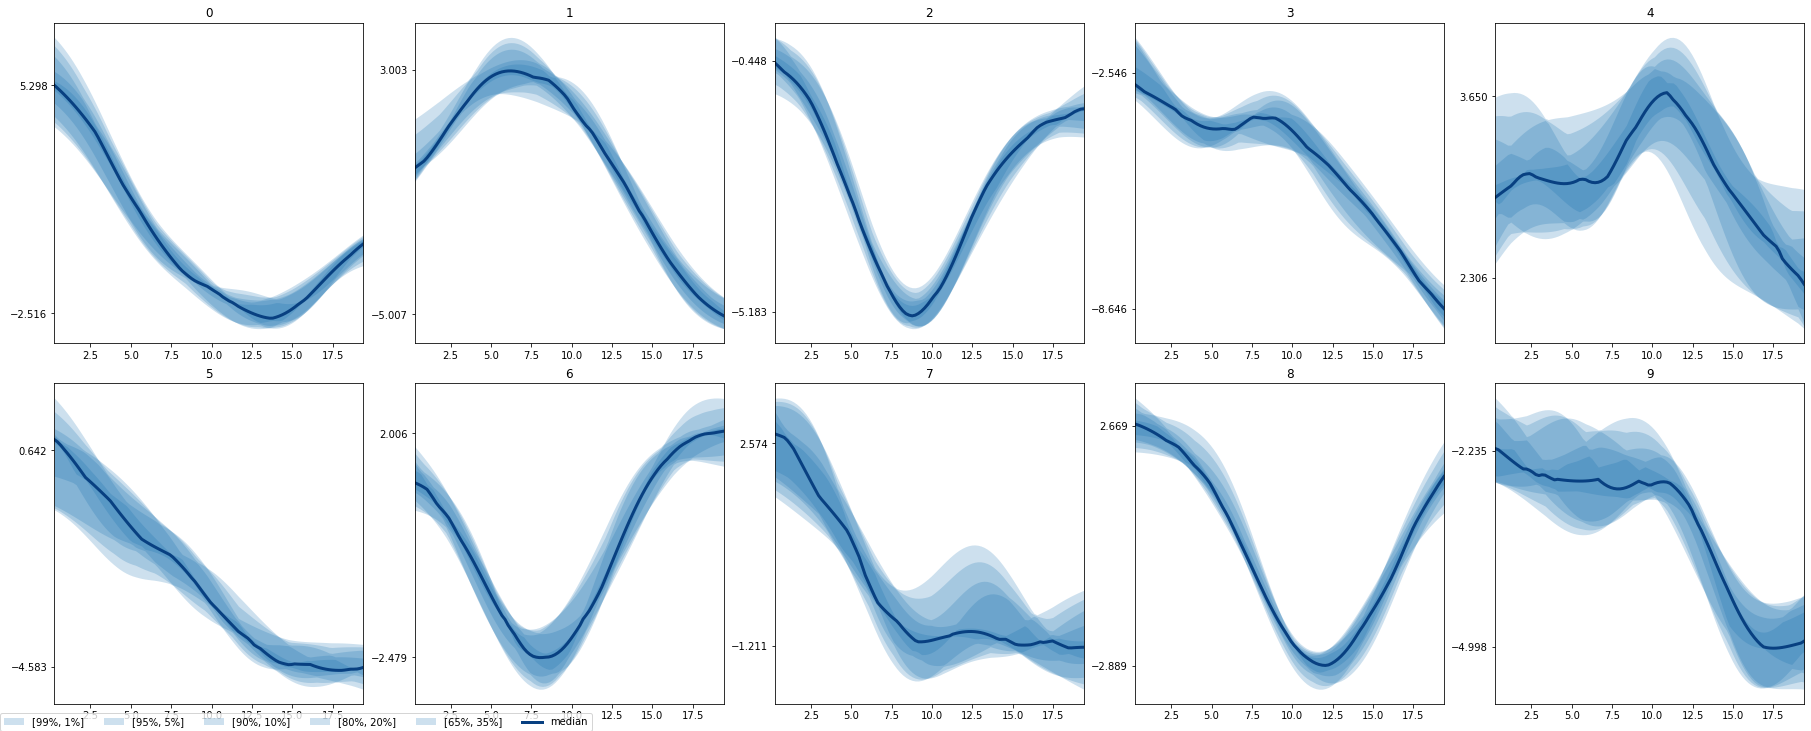

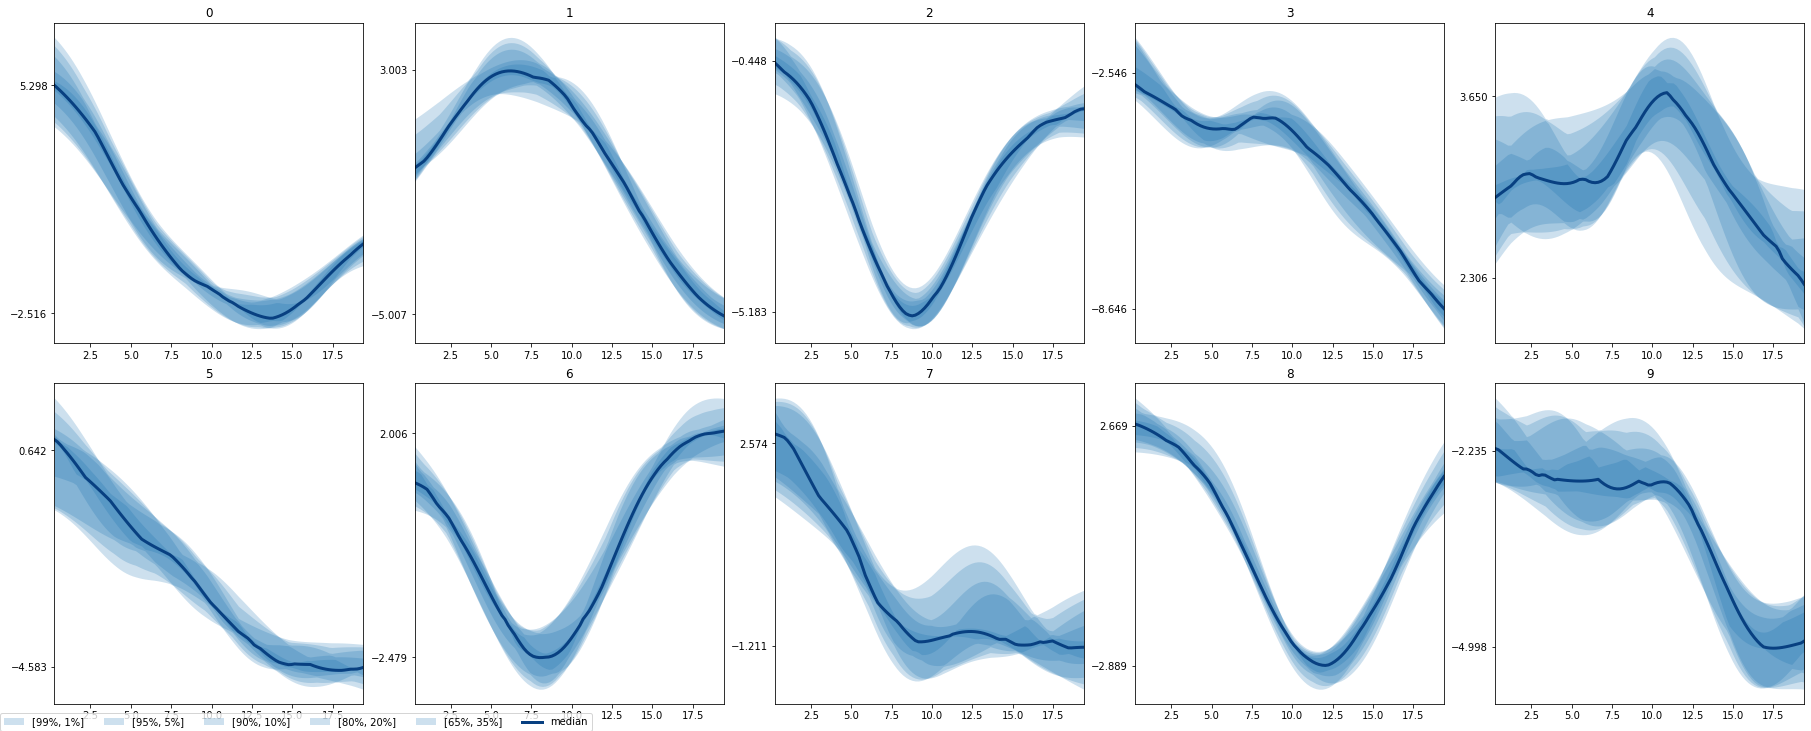

In [47]:
x_causal.plot_features()

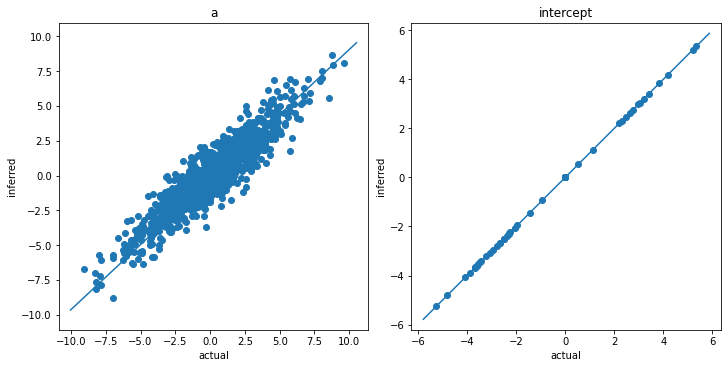

In [48]:
parameter_values = la.qa.cookbooks.check_parameters(
    la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed)
)

In [49]:
dim = la.Dim([1, 2, 3, 4], "h")

In [50]:
x_value = pd.Series([1.0, 2.0, 3.0, 0.0], index=dim.index, name="x")
x = la.Fixed(x_value)

y = la.links.scalar.Spline(x)

assert y.value_definition[0] == x[0]
assert y.ndim == 1